In [1]:
# First import the functions we will need
import sys

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# This script requires TensorFlow 2 and Python 3.
if tf.__version__.split('.')[0] != '2':
    raise Exception((f"The script is developed and tested for tensorflow 2. "
                     f"Current version: {tf.__version__}"))

if sys.version_info.major < 3:
    raise Exception((f"The script is developed and tested for Python 3. "
                     f"Current version: {sys.version_info.major}"))


# GradientTape

The Calculus is managed by a TensorFlow Gradient Tape. You can learn more about the gradient tape at https://www.tensorflow.org/api_docs/python/tf/GradientTape, and we will discuss it later in the course.

In [3]:
# Define our initial guess
INITIAL_W = 10.0
INITIAL_B = 10.0

# Define our loss function
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

# Define our training procedure
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
    # Here is where you differentiate the model values with respect to the loss function
    dw, db = t.gradient(current_loss, [model.w, model.b])
    # And here is where you update the model values based on the learning rate chosen
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    return current_loss

# Define our simple linear regression model
class Model(object):
  def __init__(self):
    # Initialize the weights
    self.w = tf.Variable(INITIAL_W)
    self.b = tf.Variable(INITIAL_B)

  def __call__(self, x):
    return self.w * x + self.b

### Train our model

In [6]:
# Define our input data and learning rate
xs = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
ys = [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]
LEARNING_RATE=0.1

# Instantiate our model
model = Model()

# Collect the history of w-values and b-values to plot later
list_w, list_b = [], []
epochs = range(50)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=LEARNING_RATE)
  losses.append(current_loss)
  print(f"Epoch {epoch:2d}: w={list_w[-1]:1.2f} b={list_b[-1]:1.2f}, "
        f"loss={current_loss:2.5f}")

Epoch  0: w=10.00 b=10.00, loss=715.66669
Epoch  1: w=-1.57 b=5.40, loss=38.20575
Epoch  2: w=0.20 b=5.19, loss=21.63014
Epoch  3: w=0.20 b=4.49, loss=17.24073
Epoch  4: w=0.41 b=3.93, loss=13.86214
Epoch  5: w=0.57 b=3.42, loss=11.14769
Epoch  6: w=0.72 b=2.97, loss=8.96482
Epoch  7: w=0.85 b=2.56, loss=7.20938
Epoch  8: w=0.97 b=2.19, loss=5.79768
Epoch  9: w=1.08 b=1.86, loss=4.66241
Epoch 10: w=1.17 b=1.57, loss=3.74944
Epoch 11: w=1.26 b=1.30, loss=3.01525
Epoch 12: w=1.33 b=1.06, loss=2.42482
Epoch 13: w=1.40 b=0.85, loss=1.95001
Epoch 14: w=1.46 b=0.66, loss=1.56817
Epoch 15: w=1.52 b=0.49, loss=1.26110
Epoch 16: w=1.57 b=0.33, loss=1.01416
Epoch 17: w=1.61 b=0.20, loss=0.81557
Epoch 18: w=1.65 b=0.07, loss=0.65587
Epoch 19: w=1.69 b=-0.04, loss=0.52744
Epoch 20: w=1.72 b=-0.14, loss=0.42416
Epoch 21: w=1.75 b=-0.23, loss=0.34110
Epoch 22: w=1.78 b=-0.31, loss=0.27431
Epoch 23: w=1.80 b=-0.38, loss=0.22060
Epoch 24: w=1.82 b=-0.44, loss=0.17740
Epoch 25: w=1.84 b=-0.50, loss=0.1

### Plot our trained values over time

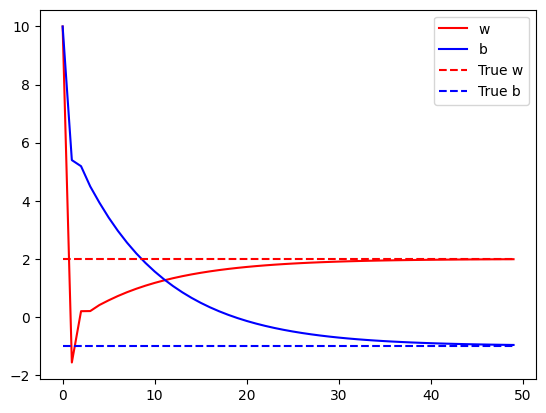

In [7]:
# Plot the w-values and b-values for each training Epoch against the true values
TRUE_w = 2.0
TRUE_b = -1.0
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()